In this first cell we will upload the CSV files that contain the pre-sorted and pre-normalized data. 
For these I used the Wisconsin breast cancer dataset, sorted it into training and test sets with the 'input' values to the Neural Network as 'X' values, and the expected 'output' (a 0 if benign and a 1 if malignant) as the 'Y' values.


In [ ]:
#Step 1: Loading Data
import pandas as pd 
from google.colab import files
file = files.upload()
X_train = pd.read_csv("xtrain.csv", header=None) 
Y_train = pd.read_csv("ytrain.csv", header=None)
X_test = pd.read_csv("xtest.csv", header=None)
Y_test = pd.read_csv("ytest.csv", header=None)


Saving xtest.csv to xtest.csv
Saving xtrain.csv to xtrain.csv
Saving ytest.csv to ytest.csv
Saving ytrain.csv to ytrain.csv


Now I'm going to use Keras to define a Neural network that will be trained off of this data. This Neural Network can then be used to predict future values for breast cancer presence. 

In [ ]:
# Building model
from keras.models import Sequential #  one model in  keras
from keras.layers import Dense # dense is 1 layer 
classifier = Sequential() # Initialising the ANN creates a blank model  
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30)) # create layer; units =16 (nodes) is input dim= 30
classifier.add(Dense(units = 8, activation = 'relu'))# 70% use relu, keep the value and remove the negative value; hidden layer 
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid')) # To break the result, we also classify 2 classes ; output layer
# Having 4 layers

Once the Neural Network is defined, I now have to specify is the optimizer and loss function

In [ ]:
# compile model susing the optimizer rmsprop; loss function is binary_crossentropy 
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ["accuracy"])
#loss function: 

You now train the neural network using Classifier.fit, passing it the training data -- i.e. for this set of X, this is what the Y should look like. The NN will then spot the patterns in the data, and build a neural network that could replicate that. 

In [ ]:
history=classifier.fit(X_train, Y_train, batch_size = 1, epochs = 20 )

Epoch 1/20
455/455 [==============================] - 2s 2ms/step - loss: 0.4237 - accuracy: 0.7516
Epoch 2/20
455/455 [==============================] - 1s 2ms/step - loss: 0.1915 - accuracy: 0.9538
Epoch 3/20
455/455 [==============================] - 1s 2ms/step - loss: 0.1110 - accuracy: 0.9692
Epoch 4/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9736
Epoch 5/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9758
Epoch 6/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9802
Epoch 7/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9846
Epoch 8/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9846
Epoch 9/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9824
Epoch 10/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9846

To predict new values, the Neural Network uses classifier.predict. I'm going to pass it the test values for X (which the Neural Network hasn't previously seen) and it will give me back a set of predictions. These predicitons will be probabilities, so I will clean them up by saying that if thye are greater than .5, I'll make them 1, else I'll make them 0.

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred = [ 1 if y>=0.5   else 0 for y in Y_pred ] # 0.5 là ngưỡng 

Now we can loop through the set of predicitons for the test set (called Y_pred) and the actual values for the test set (celled Y_test), and see how alike they are -- if they are the same, I'll increment 'correct', otherwise I'll incrememnt 'wrong'. 



In [ ]:
total = 0
correct = 0
wrong = 0
for i in Y_pred:
  total=total+1
  if(Y_test.at[i,0] == Y_pred[i]):
    correct=correct+1
  else:
    wrong=wrong+1
print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 114
Correct 114
Wrong 0


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

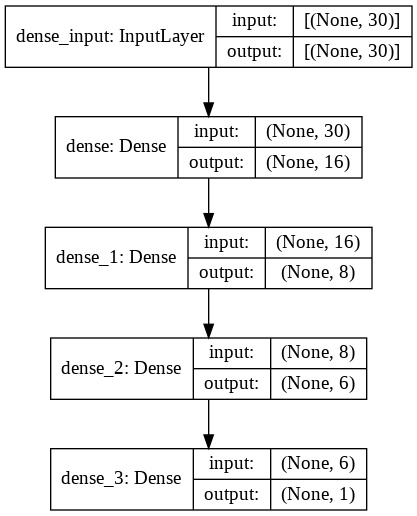

In [ ]:
plot_model(classifier, to_file= "ex_1_model.png", show_shapes= True)
Image(filename= "ex_1_model.png")

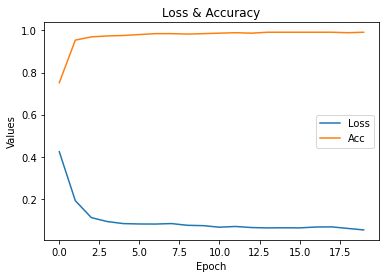

In [ ]:
# show training test 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

In [ ]:
# get value in validation (test)
value_test = classifier.evaluate(X_test, Y_test)
print ("Loss in validation = %.4f" % value_test[0])
print ("accucary in validation = %.4f" % value_test[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9561
Loss in validation = 0.0765
accucary in validation = 0.9561
